<a href="https://colab.research.google.com/github/Sumit-321/My-work-samples/blob/main/Using_Pycaret_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Importing required libraries
!pip install pycaret
!pip install shap
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pycaret.regression import *
from termcolor import colored

In [3]:
# Importing dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/fred_quarterly.csv', engine='python')
data.shape

(86, 7)

In [4]:
# Showing first 5 rows of the dataframe
data.head(5)

,date,month,quarter,Target,gnp,gdpdef,gdp
0,1/1/2000,2000-01,2000Q1,12935.252,10035.263,77.325,10002.179
1,4/1/2000,2000-04,2000Q2,13170.749,10283.391,77.807,10247.720
2,7/1/2000,2000-07,2000Q3,13183.890,10348.645,78.263,10318.165
3,10/1/2000,2000-10,2000Q4,13262.250,10490.430,78.688,10435.744
4,1/1/2001,2001-01,2001Q1,13219.251,10510.297,79.204,10470.231


In [5]:
# Data cleaning 
# Checking null values
data.isnull().sum()

date       0
month      0
quarter    0
Target     0
gnp        1
gdpdef     0
gdp        0
dtype: int64

In [6]:
# Filling null value with mean value of the column
data['gnp'].fillna(data['gnp'].mean(), inplace= True)

In [7]:
# Checking again for null values
data.isnull().sum()

date       0
month      0
quarter    0
Target     0
gnp        0
gdpdef     0
gdp        0
dtype: int64

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

**Now I have no null and duplicate value in my dataframe.**

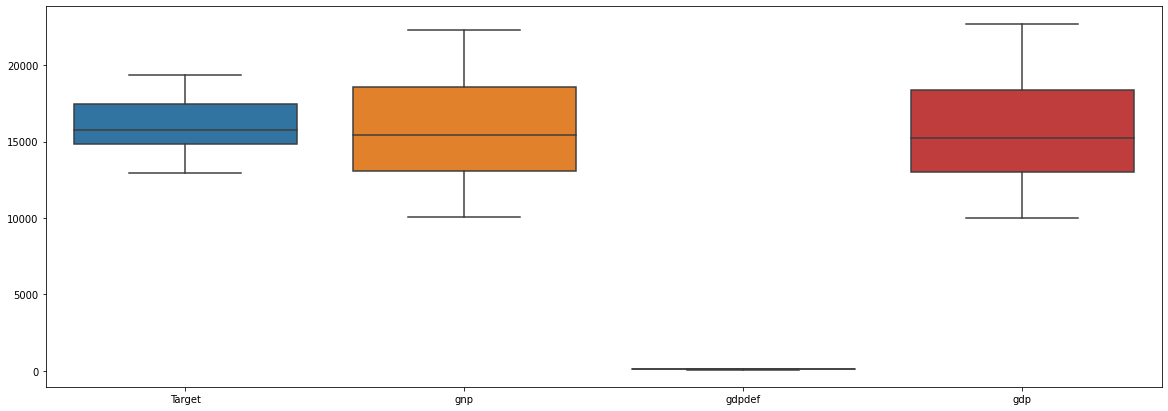

In [9]:
# Box plot for different variables
plt.figure(figsize= (20, 7))
seaborn.boxplot(data= data)
plt.show()

In [10]:
# Creating train and test sets from the dataframe
features= ['gnp', 'gdpdef', 'gdp']
target= ['Target']
x= data[features]
y= data[target]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state= 1)
print('Train set shape is :',x_train.shape)
print('Test set shape is :',x_test.shape)

Train set shape is : (77, 3)
Test set shape is : (9, 3)


In [11]:
# Decision tree regressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred= dtr.predict(x_test)
print('r2 score for Decision tree regressor is :', r2_score(y_test, y_pred).round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3) )
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred).round(decimals= 3)) )

r2 score for Decision tree regressor is : 0.249
Mean absolute error is : 593.079
Mean squared error is : 1455012.204
Root mean squared error is : 1206.2388668916285


In [12]:
# Linear Regression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('r2 score for Linear Regression is :', r2_score(y_test, y_pred).round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3) )
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred).round(decimals= 3)) )

r2 score for Linear Regression is : 0.449
Mean absolute error is : 465.074
Mean squared error is : 1067068.484
Root mean squared error is : 1032.9900696521725


In [13]:
# Random Forest Regressor
rfr= RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred= rfr.predict(x_test)
print('r2 score for Random Forest Regressor is :', r2_score(y_test, y_pred).round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3) )
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred).round(decimals= 3)) )

r2 score for Random Forest Regressor is : 0.687
Mean absolute error is : 453.245
Mean squared error is : 605548.724
Root mean squared error is : 778.1701125075417


In [14]:
# Predicting values from the model firstly by Linear Regression
input_Q1= [22545, 116.42, 22335]
input_Q2= [22812, 116.83, 22750]
input_Q3= [22998, 117.21, 22986]
input_Q4= [23187, 117.59, 23208]
input_Q5= [23450, 117.81, 23490]
input_Q6= [23896, 118.09, 23756]
predicted_target_Q1= lr.predict([input_Q1])
predicted_target_Q2= lr.predict([input_Q2])
predicted_target_Q3= lr.predict([input_Q3])
predicted_target_Q4= lr.predict([input_Q4])
predicted_target_Q5= lr.predict([input_Q5])
predicted_target_Q6= lr.predict([input_Q6])
print(colored('Predicted target value for first quarter :', 'green', attrs= ['bold']), predicted_target_Q1)
print(colored('Predicted target value for second quarter :', 'green', attrs= ['bold']), predicted_target_Q2)
print(colored('Predicted target value for third quarter :', 'green', attrs= ['bold']), predicted_target_Q3)
print(colored('Predicted target value for fourth quarter :', 'green', attrs= ['bold']), predicted_target_Q4)
print(colored('Predicted target value for fifth quarter :', 'green', attrs= ['bold']), predicted_target_Q5)
print(colored('Predicted target value for sixth quarter :', 'green', attrs= ['bold']), predicted_target_Q6)

Predicted target value for first quarter : [[19548.25040756]]
Predicted target value for second quarter : [[19850.37126354]]
Predicted target value for third quarter : [[20004.63844842]]
Predicted target value for fourth quarter : [[20143.83502894]]
Predicted target value for fifth quarter : [[20321.18532824]]
Predicted target value for sixth quarter : [[20413.35247001]]


In [15]:
# Creating a dataframe with desired variables
df= data[['gnp', 'gdpdef', 'gdp', 'Target']]

In [16]:
# Description of dataframe
df.describe()

,gnp,gdpdef,gdp,Target
count,86.000000,86.000000,86.000000,86.000000
mean,15788.494200,96.672000,15705.747209,16043.371291
std,3524.898314,11.154457,3528.301498,1809.872040
min,10035.263000,77.325000,10002.179000,12935.252000
25%,13054.165500,87.280000,12977.652500,14868.853000
50%,15431.246000,96.564000,15225.538000,15781.342000
75%,18553.959500,104.986500,18401.999250,17456.204250
max,22273.060000,117.380000,22722.581000,19358.176000


In [17]:
# Correlation matrix
correlation= df.corr()
correlation

,gnp,gdpdef,gdp,Target
gnp,1.000000,0.972529,0.976107,0.975685
gdpdef,0.972529,1.000000,0.992846,0.983771
gdp,0.976107,0.992846,1.000000,0.996021
Target,0.975685,0.983771,0.996021,1.000000


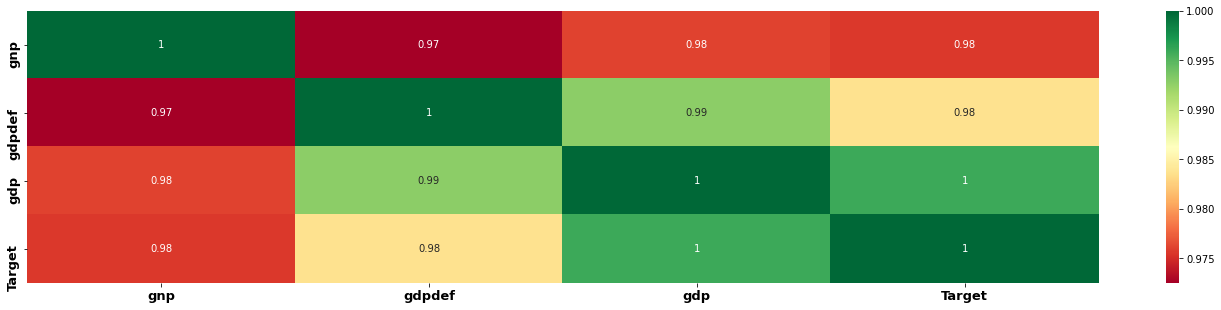

In [18]:
# Heatmap from correlation matrix
plt.figure(figsize= (24, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.show()

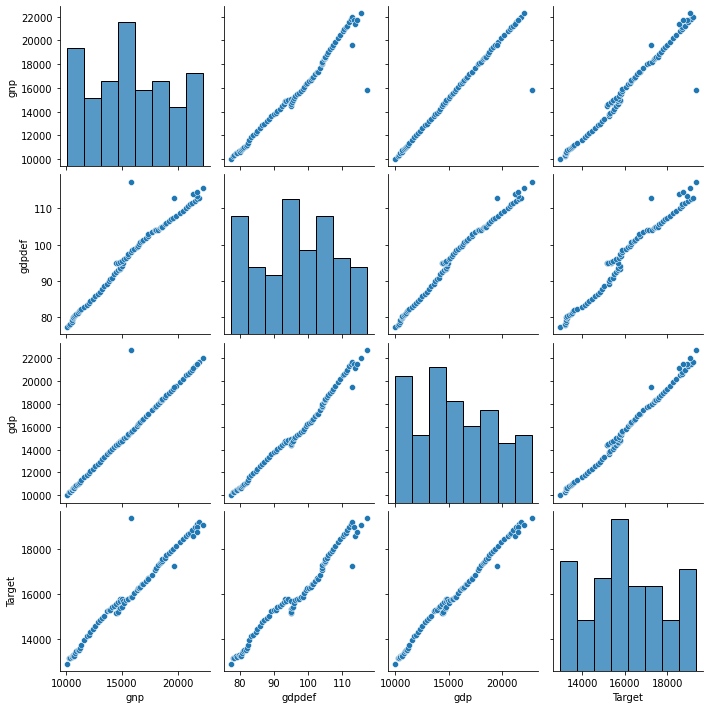

In [19]:
# Pairplot for different variables
seaborn.pairplot(df)
plt.show()

In [20]:
# Pycaret package
print(colored('Now using Pycaret package', 'green', attrs= ['bold']))

Now using Pycaret package


In [21]:
# Setting up Pycaret package
exp= setup(data= df, target= 'Target')

,Description,Value
0,session_id,5202
1,Target,Target
2,Original Data,"(86, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(60, 3)"


In [22]:
# Comparing models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,145.9511,3.104708e+04,165.3248,0.9865,0.0104,0.0092,0.016
omp,Orthogonal Matching Pursuit,145.3397,3.100081e+04,165.2584,0.9865,0.0104,0.0092,0.013
br,Bayesian Ridge,158.2389,4.890876e+04,194.4814,0.9789,0.0119,0.0098,0.013
dt,Decision Tree Regressor,153.1501,5.463666e+04,197.4794,0.9754,0.0117,0.0094,0.014
knn,K Neighbors Regressor,155.8514,7.665698e+04,216.7061,0.9685,0.0128,0.0094,0.064
et,Extra Trees Regressor,133.3112,1.009075e+05,217.9890,0.9571,0.0125,0.0078,0.356
rf,Random Forest Regressor,166.8960,1.044570e+05,243.2316,0.9565,0.0140,0.0099,0.412
ada,AdaBoost Regressor,201.4232,1.184344e+05,279.9591,0.9508,0.0166,0.0121,0.060
gbr,Gradient Boosting Regressor,172.4342,1.189500e+05,256.3422,0.9505,0.0148,0.0102,0.039
en,Elastic Net,171.3777,1.944360e+05,270.8562,0.9183,0.0165,0.0104,0.016


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=5202, verbose=False)

### **High R2 score is coming for Orthogonal Matching Pursuit model.**

In [23]:
# Creating best model out of different models
best_model= create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,149.6704,26807.1948,163.7290,0.9882,0.0102,0.0092
1,185.5357,36824.2301,191.8964,0.9910,0.0122,0.0116
2,230.9504,105681.0469,325.0862,0.9461,0.0192,0.0145
3,81.9034,7020.0185,83.7856,0.9952,0.0055,0.0053
4,127.9384,18226.1190,135.0041,0.9942,0.0089,0.0082
5,140.3899,21023.8321,144.9960,0.9960,0.0093,0.0089
6,128.1798,22726.6457,150.7536,0.9904,0.0086,0.0074
7,115.7402,17041.7797,130.5442,0.9953,0.0080,0.0073
8,157.4778,35535.9659,188.5099,0.9737,0.0122,0.0099
9,135.6114,19121.2217,138.2795,0.9952,0.0097,0.0094


In [24]:
# Showing best model
best_model

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [25]:
# Tuning best model
tune= tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,149.6704,26807.1948,163.7290,0.9882,0.0102,0.0092
1,185.5357,36824.2301,191.8964,0.9910,0.0122,0.0116
2,230.9504,105681.0469,325.0862,0.9461,0.0192,0.0145
3,81.9034,7020.0185,83.7856,0.9952,0.0055,0.0053
4,127.9384,18226.1190,135.0041,0.9942,0.0089,0.0082
5,140.3899,21023.8321,144.9960,0.9960,0.0093,0.0089
6,128.1798,22726.6457,150.7536,0.9904,0.0086,0.0074
7,115.7402,17041.7797,130.5442,0.9953,0.0080,0.0073
8,157.4778,35535.9659,188.5099,0.9737,0.0122,0.0099
9,135.6114,19121.2217,138.2795,0.9952,0.0097,0.0094


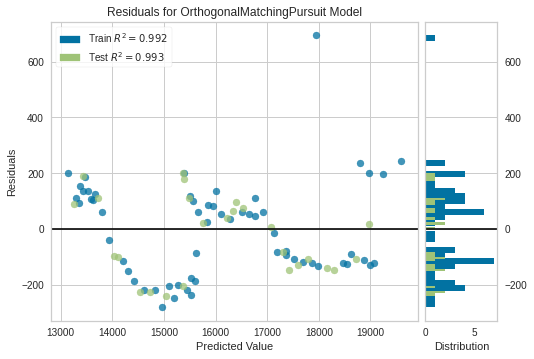

In [26]:
# Plotting the tuned model
plot_model(tune)

In [27]:
# Evaluating the tuned model
evaluate_model(tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
# Taking out predictions from the tuned model
predictions= predict_model(tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,121.3324,18930.083,137.5866,0.9933,0.009,0.0078


In [29]:
# Showing the predictions sorted with respect to Target value
predictions.sort_values(by= 'Target')

,gnp,gdpdef,gdp,Target,Label
18,10283.390625,77.806999,10247.719727,13170.749023,13259.939657
9,10623.039062,79.996002,10598.019531,13248.141602,13438.022953
11,11217.689453,82.044998,11174.128906,13619.433594,13730.901951
8,11851.791992,83.306000,11772.234375,14131.378906,14034.963190
19,12021.455078,83.894997,11923.447266,14212.339844,14111.835885
16,12854.364258,86.453003,12767.286133,14767.845703,14540.821582
10,13225.667969,87.874001,13142.641602,14956.291016,14731.642525
1,14504.000977,94.851997,14381.236328,15161.772461,15361.311818
14,14631.306641,94.954002,14448.881836,15216.647461,15395.701032
20,13802.876953,90.000000,13753.423828,15281.525391,15042.148298


In [30]:
# Finalizing the tuned model
finalize_model(tune)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=1, normalize=True,
                          precompute='auto', tol=None)

In [31]:
# Saving the tuned model
save_model(tune, 'Fred_quarterly')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('dummy', Dummify(target='Target')),
                 ('fix_perfect', Remove_100(target='Target')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrou

In [32]:
# Predicting values from the tuned best model 
# Entering gnp, gdpdef and gdp values to predict Target values
input_Q1= [22545, 116.42, 22335]
input_Q2= [22812, 116.83, 22750]
input_Q3= [22998, 117.21, 22986]
input_Q4= [23187, 117.59, 23208]
input_Q5= [23450, 117.81, 23490]
input_Q6= [23896, 118.09, 23756]
predicted_target_Q1= tune.predict([input_Q1])
predicted_target_Q2= tune.predict([input_Q2])
predicted_target_Q3= tune.predict([input_Q3])
predicted_target_Q4= tune.predict([input_Q4])
predicted_target_Q5= tune.predict([input_Q5])
predicted_target_Q6= tune.predict([input_Q6])
print(colored('Predicted target value for first quarter :', 'blue', attrs= ['bold']), predicted_target_Q1)
print(colored('Predicted target value for second quarter :', 'blue', attrs= ['bold']), predicted_target_Q2)
print(colored('Predicted target value for third quarter :', 'blue', attrs= ['bold']), predicted_target_Q3)
print(colored('Predicted target value for fourth quarter :', 'blue', attrs= ['bold']), predicted_target_Q4)
print(colored('Predicted target value for fifth quarter :', 'blue', attrs= ['bold']), predicted_target_Q5)
print(colored('Predicted target value for sixth quarter :', 'blue', attrs= ['bold']), predicted_target_Q6)

Predicted target value for first quarter : [19404.79806989]
Predicted target value for second quarter : [19615.77325898]
Predicted target value for third quarter : [19735.74951109]
Predicted target value for fourth quarter : [19848.6085279]
Predicted target value for fifth quarter : [19991.96998169]
Predicted target value for sixth quarter : [20127.19745229]
